# Exploratory Data Analysis — Student Performance
**Date:** 2026-02-05
**Analyst:** Boranov Daniyar

This notebook loads, cleans, analyzes, and visualizes the StudentsPerformance dataset.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('StudentsPerformance.csv')

print("DATA PREVIEW:")
display(df.head())

print("\nDATA INFO:")
df.info()
print("\nMISSING VALUES:")
print(df.isnull().sum())

DATA PREVIEW:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



DATA INFO:
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB

MISSING VALUES:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype:

In [19]:
df.dropna(inplace=True)  # Drop missing values
# Ensure scores are numeric
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')
df['reading score'] = pd.to_numeric(df['reading score'], errors='coerce')
df['writing score'] = pd.to_numeric(df['writing score'], errors='coerce')

In [ ]:
print("\n--- ANSWERS TO LAB QUESTIONS ---")

# 1. Average math score by gender
avg_math_gender = df.groupby('gender')['math score'].mean()
print(f"1. Avg Math Score by Gender:\n{avg_math_gender}\n")

# 2. Correlation between reading and writing
corr_rw = df['reading score'].corr(df['writing score'])
print(f"2. Correlation (Reading vs Writing): {corr_rw:.2f}\n")

# 3. Do test prep courses help?
prep_impact = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(f"3. Impact of Test Prep Course:\n{prep_impact}\n")

# 4. Best parental education level?
df['avg_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
parent_impact = df.groupby('parental level of education')['avg_score'].mean().sort_values(ascending=False)
print(f"4. Best Parental Education Level (by Total Score):\n{parent_impact}\n")

# 5. Score distribution by lunch
lunch_stats = df.groupby('lunch')['avg_score'].describe()
print(f"5. Score Stats by Lunch Type:\n{lunch_stats}\n")


--- ANSWERS TO LAB QUESTIONS ---
1. Avg Math Score by Gender:
gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

2. Correlation (Reading vs Writing): 0.95

3. Impact of Test Prep Course:
                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673

4. Best Parental Education Level (by Total Score):
parental level of education
master's degree       73.598870
bachelor's degree     71.923729
associate's degree    69.569069
some college          68.476401
some high school      65.108007
high school           63.096939
Name: avg_score, dtype: float64

5. Score Stats by Lunch Type:
              count       mean        std   min        25%        50%  \
lunch                                                                   
free/reduced  355.0  62.199061  14.45

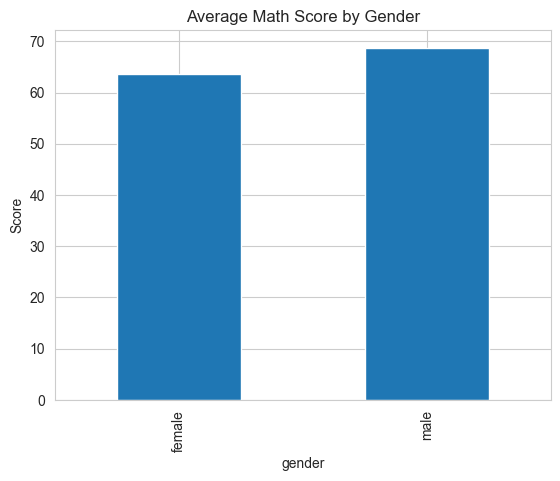

/var/folders/_x/tddpc1817tb9qpk0czts3zcr0000gn/T/ipykernel_4532/1013200488.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=parent_impact.index, y=parent_impact.values, palette='viridis')


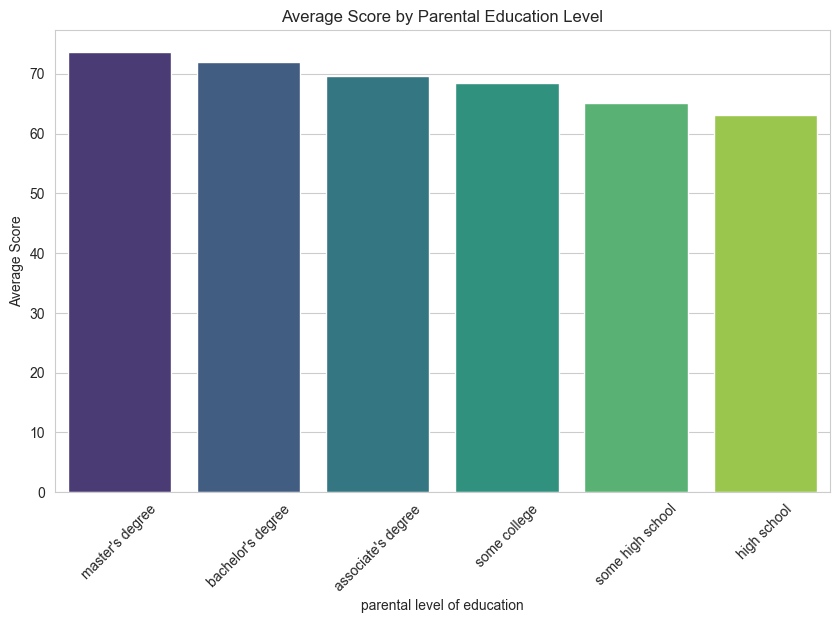

/var/folders/_x/tddpc1817tb9qpk0czts3zcr0000gn/T/ipykernel_4532/1013200488.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='lunch', y='avg_score', palette='Set2')


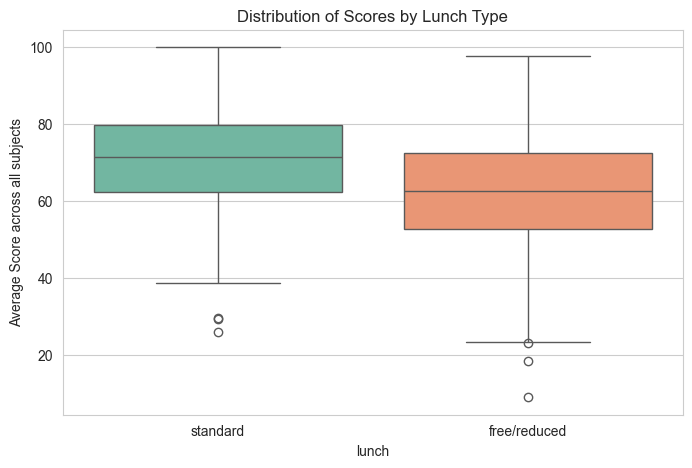

In [21]:
sns.set_style("whitegrid")
# Chart 1: Bar Chart (Gender vs Math Score)
df.groupby('gender')['math score'].mean().plot(kind='bar')
plt.title('Average Math Score by Gender')
plt.ylabel('Score')
plt.show()

# Chart 2: Bar Chart (Parental Education)
plt.figure(figsize=(10, 6))
sns.barplot(x=parent_impact.index, y=parent_impact.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education Level')
plt.ylabel('Average Score')
plt.show()

# Chart 3: Box Plot (Lunch Effect)
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='lunch', y='avg_score', palette='Set2')
plt.title('Distribution of Scores by Lunch Type')
plt.ylabel('Average Score across all subjects')
plt.show()

# EDA REPORT

## Executive Summary
- Dataset contains 1000 records and 8 features.
- Test preparation significantly improves student performance.
- Reading and writing scores are strongly correlated.
- Parental education level influences academic success.

## Data Quality
- No missing values were detected.
- Data types were already correct.
- No significant outliers requiring removal were found.

## Key Insights
- Students who completed test preparation perform better.
- Reading and writing scores move together.
- Gender differences exist in math performance.

## 4. Visualization Summary
- Chart 1 shows average math score differences by gender.
- Chart 2 shows how parental education relates to average score.
- Chart 3 shows score distribution across lunch types.

## Recommendations
- Encourage test preparation programs.
- Focus support on low-performing lunch groups.
- Further analyze parental education impact.